###  Importing Required Libraries


In [49]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 📂 Loading the Dataset

In [50]:
df = pd.read_csv(r"C:\Users\krish\OneDrive\Desktop\Resume_screnning\UpdatedResumeDataSet.csv", encoding='ISO-8859-1', on_bad_lines='skip')


In [51]:

df.head(10)
     

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills Ã¢ÂÂ¢ R Ã¢ÂÂ¢ Python Ã¢ÂÂ¢ SAP HANA ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills Ã¢ÂÂ¢ Python Ã¢ÂÂ¢ Tableau Ã¢ÂÂ¢ Dat...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills Ã¢ÂÂ¢ Ability to quickly gras...
9,Data Science,Expertise Ã¢ÂÂ Data and Quantitative Analysi...


In [52]:

df.shape

(962, 2)

### 🧾 Dataset Summary Using `df.info()`

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


###  📊 Resume Category Distribution

In [54]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

### 📈 Visualization of Resume Category Distribution

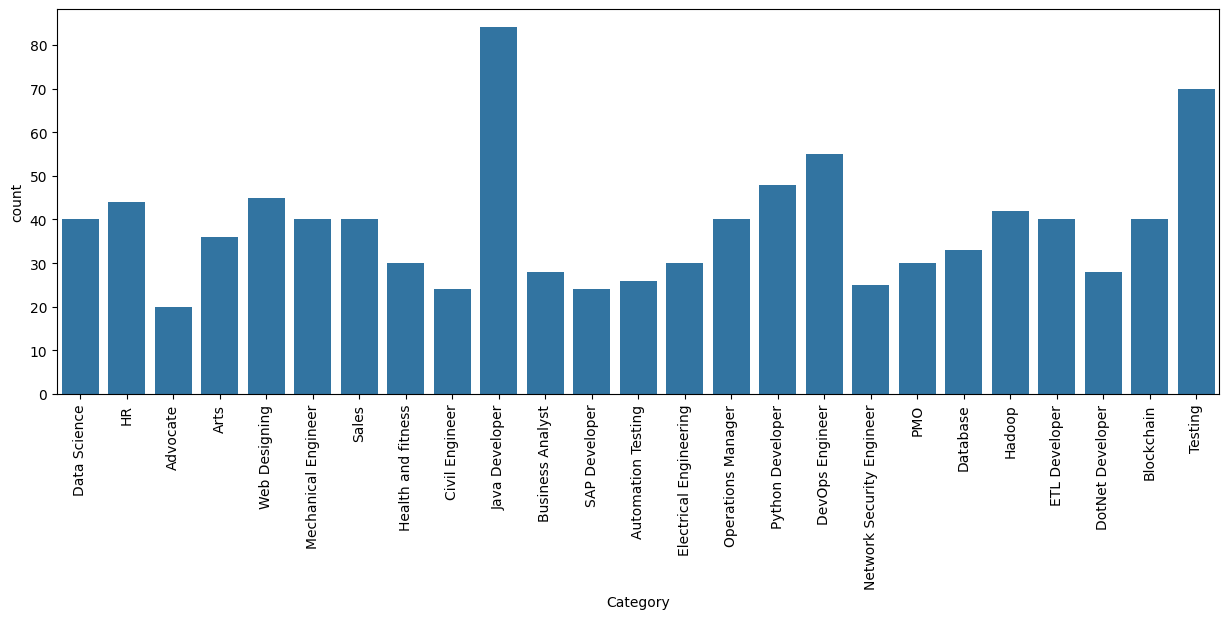

In [55]:

plt.figure(figsize=(15,5))
sns.countplot(x='Category', data=df)
plt.xticks(rotation=90)
plt.show()

In [56]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()

In [57]:
print(labels)

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


### 🥧 Resume Category Distribution - Pie Chart

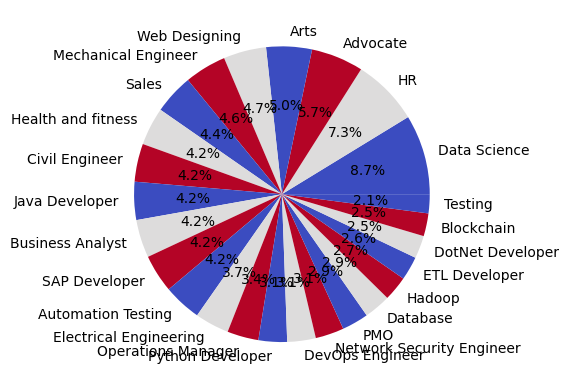

In [58]:
plt.pie(counts,labels=labels, autopct='%1.1f%%', colors=plt.cm.coolwarm(np.linspace(0,1,3)))
plt.show()

In [14]:
df['Category'][0]

'Data Science'

In [15]:

df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ\x83Â¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investi

### 🧹 Text Preprocessing: Cleaning Resume Text


In [16]:

import re
def cleanResume(txt):
  cleanTxt = re.sub('http\S+\s',' ', txt)
  cleanTxt = re.sub('@\S+',' ',cleanTxt)
  cleanTxt = re.sub('#\S+',' ',cleanTxt)
  cleanTxt = re.sub('\s+',' ',cleanTxt)
  cleanTxt = re.sub('RT|cc', ' ', cleanTxt)
  cleanTxt = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanTxt)
  cleanTxt = re.sub(r'[^\x00-\x7f]', ' ', cleanTxt)

  return cleanTxt

In [17]:

cleanResume(df['Resume'][0])

'Skills   Programming Languages  Python  pandas  numpy  scipy  scikit learn  matplotlib   Sql  Java  JavaScript JQuery    Machine learning  Regression  SVM  Na    ve Bayes  KNN  Random Forest  Decision Trees  Boosting techniques  Cluster Analysis  Word Embedding  Sentiment Analysis  Natural Language processing  Dimensionality reduction  Topic Modelling  LDA  NMF   PCA   Neural Nets    Database Visualizations  Mysql  SqlServer  Cassandra  Hbase  ElasticSearch D3 js  DC js  Plotly  kibana  matplotlib  ggplot  Tableau    Others  Regular Expression  HTML  CSS  Angular 6  Logstash  Kafka  Python Flask  Git  Docker  computer vision   Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate   Ernst   Young LLP Skill Details JAVASCRIPT  Exprience   24 months jQuery  Exprience   24 months Python  Exprience   24 monthsCompany Details company   Ernst   Young LLP description   Fraud Investigations and Dispute Services Assurance 

In [18]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [19]:

df['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

### 🔢 Label Encoding of Resume Categories

In [20]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

In [21]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control Syste...
3,6,Skills R Python SAP HANA ...
4,6,Education Details MCA YMCAUST Faridabad Hary...
...,...,...
957,23,Computer Skills Proficient in MS offic...
958,23,Willingness to a ept the challenges ...
959,23,PERSONAL SKILLS Quick learner E...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power ...


In [22]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [ ]:


# ['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
#  'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
#  'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
#  'Electrical Engineering' 'Operations Manager' 'Python Developer'
#  'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
#  'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']

### 🧠 TF-IDF Vectorization

In [23]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredText = tfidf.transform(df['Resume'])
     


In [24]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control Syste...
3,6,Skills R Python SAP HANA ...
4,6,Education Details MCA YMCAUST Faridabad Hary...
...,...,...
957,23,Computer Skills Proficient in MS offic...
958,23,Willingness to a ept the challenges ...
959,23,PERSONAL SKILLS Quick learner E...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power ...


### ✂️ Splitting Data into Train and Test Sets

In [25]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size=0.2, random_state=42)

In [26]:

print(X_train.shape)
print(X_test.shape)
     

(769, 7351)
(193, 7351)


### Training K-Nearest Neighbors (KNN) Classifier


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier()
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


### 💾 Saving the Model and Vectorizer with Pickle


In [28]:

import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [29]:
myResume ="""  
Krishna Koushik
 Krishna Koushik
 krishnakoushik1707@gmail.com 
Krishna Koushik 
Results-driven engineering student with a strong foundation in data analytics, artificial intelligence (AI), and business
 intelligence (BI). Proficient in Python, Java, and SQL, with hands-on experience in building interactive dashboards using
 Power BI and Excel. Passionate about leveraging machine learning, generative AI, and cloud technologies such as Microsoft
 Azure to develop scalable, data-driven solutions. Skilled in problem-solving, data processing, and model implementation,
 with a keen interest in contributing to impactful AI-powered applications.
 Technical Skills
 Languages: Python(Data Structures and Algorithms), Java, SQL, R.
 Data Analysis: Power BI, Microsoft Excel, Pandas, NumPy, Statistics, EDA.
 Machine Learning & AI: Scikit-learn, Generative AI, Prompt Engineering, Natural Language Processing.
 Tools: GitHub, Jupyter Notebook, Google Colab, Visual Studio Code.
 Course Work: Data Structures and Algorithms, Object Oriented Programming, Database Management Systems,
 Operating Systems, AI and ML, Cloud Computing- AWS S3.
 Soft Skills
 • Strong communication, effective leadership, and proven adaptability in guiding teams through dynamic challenges.
 Skilled in team collaboration, consistently contributing to group objectives and shared accomplishments.
 • Proven problem-solving abilities with a results-oriented mindset, supported by clear report writing and confident
 presentation skills to aid decision-making and ensure project alignment.
 Projects
 Superstore Interactive Sales & Profit Dashboard
 • Built an interactive Excel dashboard to provide a 360° view of Superstore sales data, enabling business users to analyze
 sales, profit, ROI, and discount impact across categories, regions, cities, and time periods.
 • Focused on transforming raw data into actionable insights through structured analysis and visual storytelling.
 • Technologies: Microsoft Excel, Pivot Tables, Charts, Slicers, Formulas.
 HR performance and attrition dashboard
 • Designed and developed a dynamic HR analytics dashboard in Power BI to analyze key workforce metrics such as
 attrition rate, employee satisfaction, salary distribution across departments, age groups and education backgrounds.
 • Used Power Query for data cleaning and DAX for creating calculated KPIs.
 • Technologies: Power BI, DAX, Power Query, CSV.
 Education
 Vellore Institute of Technology, Andhra Pradesh
 Bachelor of Technology in Computer Science and Engineering(AIML)
 Raju Junior College, Allen Career Institute, Tirupati
 Senior Secondary (XII)
 Sri Raju High School, Rayachoty
 Secondary (X)
 Achievements
 2022– 2026
 CGPA: 8.37
 2021– 2022
 Percentage: 91
 2019– 2020
 Percentage: 100
 • LeetCode: 1592 max-rated and solved 110+ problems. Profile: Krishna Koushik
 • Data Analytics Virtual Internship– Deloitte (via Forage) click here
 Completed a real-world data analytics job simulation focused on data analysis and business problem-solving- May 202 """

### 🧠 Predicting Job Category from Resume Text

In [48]:
import pickle

#Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

#clean the input resume
cleaned_resume = cleanResume(myResume)

input_features = tfidf.transform([cleaned_resume])

prediction_id = clf.predict(input_features)[0]

category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
    25: "AI Engineer",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)

print(prediction_id)

Predicted Category: Data Science
6
